# CS405 Machine Learning
## Lab05 Decision Trees

## 1. Introduction
This lab introduces classical machine learning algorithms, decision trees (DTs) and their ensemble learning variations, random forests (RFs). Decision trees are important non-parameter learning methods. Although DTs are simple and limited, they still can achieve excellent performance using ensemble learning schemes. In this lab, we will learn decision trees from the beginning and will implement RF at last. The scikit-learn package will be used to save your time.


## 2. Decision tree
It is better to understand the basic principle of decision trees before using them. Please read the Lab05_DecisionTree.pdf or other related documents. Now we assume you have been familiar with decision trees. First, we load the scikit-learn iris toy dataset as an example. For visualization, only the last 2 attributes are used.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

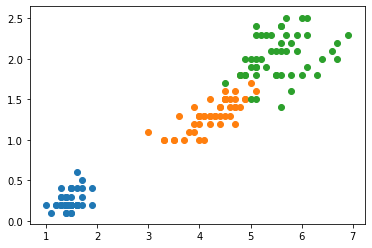

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

Here we import a sklearn decision tree model and train it with the training data.

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Define a visualize function with the following codes and run it with some parameters.

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

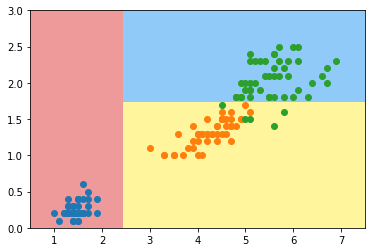

In [7]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

The dataset is divided by some vertical and horizontal lines which represent classification boundaries of the decision tree.

We can also visualize the trained model in a “tree” structure with the plot_tree( ) function

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

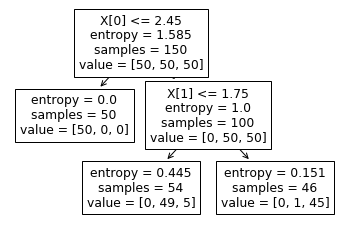

In [8]:
from sklearn import tree

tree.plot_tree(dt_clf)

**Problem:** Decision trees are quite easy to use, but they are prone to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.

<font size='3' color='red'> 
Exercise 01:
    
When we create a decision tree dt_clf, we only use two arguments. Actually, there are so many arguments and they are all helpful in adjusting the algorithm parameters to achieve the balance between bias and variance. Please describe the meaning of each argument and explain how it affects the classification result in terms of bias and variance.
</font>

## 3. Random forest
In Lab05_DecisionTree.pdf we have introduced that a RF can be constructed through bagging and decision trees. Thus, in scikit-learn, there are two ways to implement an RF, from the Bagging view and from the RF view. First, we create a random dataset.

In [9]:
# Create random dataset
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

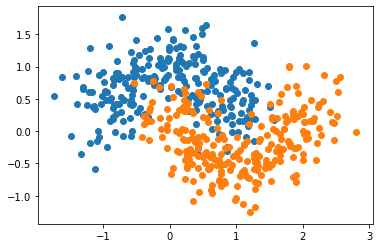

In [10]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

<font color=black face=雅黑>**Bagging view:**</font> we use the bagging algorithm with a number of base learning algorithms of decision trees.

In [13]:
# Use Random Forest from Bagging view

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                max_samples=300,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bagging_clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  n_estimators=300, oob_score=True)

Because we use oob_score (out-of-bag data for score), so we do not need a separated testing set.

In [14]:
# Output oob score
bagging_clf.oob_score_

0.91

See the result.

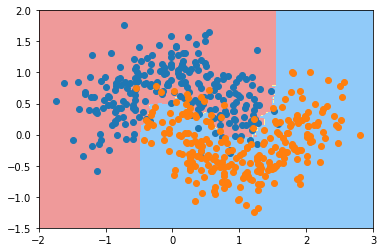

In [15]:
plot_decision_boundary(bagging_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

<font color=black face=雅黑>**RF view:**</font> we construct a RF class directly.

In [20]:
# Use Random Forest directly

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )
rf_clf.fit(X,y)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=666)

There are many arguments for either base decision trees or the whole ensemble algorithm. A good ensemble algorithm should make sure that base ones are both accurate and diversified. So it is better to get a set of good enough base tree parameters before training the ensemble learning algorithm. Than we see the results.

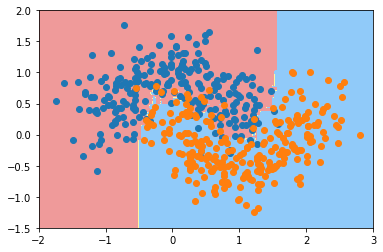

In [21]:
plot_decision_boundary(rf_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

<font size='3' color='red'> 
Exercise 02:
    
Explain the meaning of the arguments of BaggingClassifier( ) and RandomForestClassifier( ) respectively, compare the performances of two construction methods, and discuss the classification results in terms of bias and variance by choosing different argument values.
</font>

## Questions:
(1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

(2) What are the strengths of the decision tree/random forest methods; when do they perform well?

(3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?

(4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?

## 4. Lab Tasks
Please finish Exercises 01 and 02, and answer the questions.

## 5. References
https://scikit-learn.org/stable/